<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="https://www.uoc.edu/portal/system/modules/edu.uoc.presentations/resources/img/branding/logo-uoc-default.png", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.403 · Programació per a la ciència de dades</p>
    <p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Programación para la ciencia de datos - PEC4
============================

En este Notebook encontraréis el ejercicio que supone la cuarta y última actividad de evaluación continuada (PEC) de la asignatura. Esta PEC intenta presentaros un pequeño proyecto en el cual debéis resolver diferentes ejercicios, que  engloba muchos de los conceptos cubiertos durante la asignatura. 

El objetivo de este ejercicio será desarrollar un **paquete de Python** fuera del entorno de Notebooks, que nos permita resolver el problema dado. 
Trabajaréis en archivos Python planos `.py`. Éste tendrá que incluir el correspondiente código organizado lógicamente (separado por módulos, organizados por funcionalidad,...), la documentación del código (*docstrings*) y tests. Además, tendréis que incluir los correspondientes archivos de documentación de alto nivel (`README`) así como los archivos de licencia y dependencias (`requirements.txt`) comentados en la teoría.

Hacer un `setup.py` es opcional, pero si se hace se valorará positivamente de cara a la nota de la práctica y del curso.

# Enunciado: Orbea Monegros 2024

La **Orbea Monegros** es una prueba de ciclismo de montaña (BTT) no competitiva que se realiza en Sariñena (Huesca). La clasificación se puede consultar en el enlace, con los nombres reales de los ciclistas, pero nosotros hemos preferido anonimizar los datos de los ciclistas, que proporcionamos en el dataset que encontrarás en la carpeta *data/*.

* https://www.orbea.com/es-es/eventos/monegros-2024
* https://sportmaniacs.com/es/races/orbea-monegros-2024/662d72e2-07c8-4360-be3d-4072ac1f171c/results#rankings


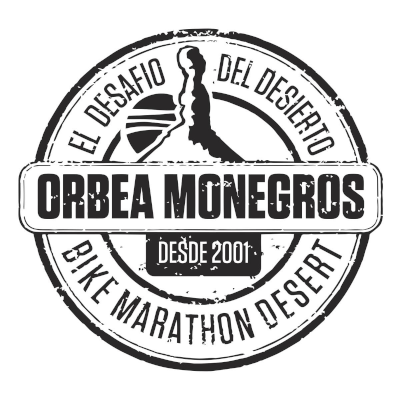

# Proyecto Python, funcionalidad

Para hacer la entrega más fácil y homogénea os pedimos que organicéis el código de tal manera que **desde el fichero principal retorne todas las respuestas que se os pida en la PEC** haciendo uso de funciones que tendréis que definir en módulos.  Para eso, en cada ejercicio os indicaremos el formato que tiene que tener cada respuesta, de tal manera que ejecutando `main.py` se vaya respondiendo a toda la PEC. Por defecto, `main.py` debe ejecutar todas las funciones de la PEC mostrando cómo funcionan pero también debe permitir ejecutarlas una a una si se desea (entendiendo que para ejecutar la segunda se tiene que haber ejecutado la primera, etc). Debéis documentarlo todo muy bien en el *README* para que el profesor pueda ejecutar el código sin problemas y sin dudas. Os recordamos que en el *README* también tenéis que indicar cómo ejecutar los test y comprobar la cobertura de éstos.

## Ex1 (1p). Importación del dataset y EDA

* Importación del dataset a dataframe.
* Mostrar los 5 primeros valores
* ¿Cuántos ciclistas participaron en la prueba?
* ¿Qué columnas tiene el dataframe?

## Ex2 (1,5p). Anonimizar los ciclistas. Limpiar el dataset
Aunque los datos que te proporcionamos ya están anonimizados, vamos a suponer que son los datos reales, y que los queremos anonimizar. Puedes utilizar la librería *Faker* para generar nombres y apellidos (en inglés).

Define la función *name_surname(df)*, donde le pasaremos como argumento el dataframe, y nos devolverá el nuevo dataframe con los nombres cambiados (columna *biker*).

Ejecuta la función, y muestra los 5 primeros valores del dataframe.

Los ciclistas que tienen un tiempo *00:00:00* significa que no participaron en la prueba (estaban inscritos pero no hicieron la carrera). Elimínalos del dataset.

¿Cuántos ciclistas tenemos ahora en el dataframe? Muestra los 5 primeros. Recupera los datos del ciclista con dorsal=1000.

## Ex3 (1,5p). Agrupamiento de los minutos. Histograma
Queremos hacer un análisis estadístico de los tiempos que han tardado los ciclistas en completar la pruebaa (108 Km). Para que salga un histograma significativo se quiere agrupar los tiempos en franjas de 20 min. De manera que:
* Si un ciclista ha tardado 6h 19min 40seg se le asignará 06:00. 
* Si un ciclista ha tardado 6h 29min 40seg se le asignará 06:20.
* Si un ciclista ha tardado 6h 59min 40seg se le asignará 06:40. 

Define la función *minutes_002040()* donde pasamos un valor de tiempos en formato hh:mi:ss y devolverá un valor en formato hh:mi, donde el valor de los minutos sólo puede coger los valores 00, 20 o 40.

Con esta función crea una nueva columna *time_grouped* en el dataframe. Muestra los 15 primeros valores del dataframe. Esta nueva columna nos servirá para hacer el histograma.

Ya puedes hacer un agrupamiento (*groupby*) por la columna *time_grouped*, de manera que obtendrás un nuevo dataframe con los valores de la columna *time_grouped* y el número de ciclistas que entran dentro de cada franja. Muestra los valores de este nuevo dataframe.

Con esta información ya puedes generar el histograma, que tendrás que guardar en *img/histograma.png*.



## Ex4 (1,5p). Clubs ciclistas
Nos fijamos ahora en los clubs ciclistas de los corredores (si no pertenecen a ningún club están en la categoría *Independiente*). Pero tenemos un problema: en el formulario de inscripción el campo *club* es libre para poner cualquier cosa. Y nos encontramos valores como *Club Ciclista Huesca*, CC Huesca, C.C. Huesca, C.C.Huesca o Huesca, y todavía podría haber otras posibilidades.

Queremos limipiar (bastante, sin pretender hacerlo perfecto) el nombre de los clubs, y seguiremos estas reglas:
* convertimos el nombre del club a mayúsculas
* reemplazamos por nada los siguientes valores: 'PEÑA CICLISTA ', 'PENYA CICLISTA ', 'AGRUPACIÓN CICLISTA ', 'AGRUPACION CICLISTA ', 'AGRUPACIÓ CICLISTA ', 'AGRUPACIO CICLISTA ', 'CLUB CICLISTA ', 'CLUB '
* reemplazamos por nada los siguientes valores cuando están en el inicio (expresión regular): 'C.C. ', 'C.C ', 'CC ', 'C.D. ', 'C.D ', 'CD ', 'A.C. ', 'A.C ', 'AC ', 'A.D. ', 'A.D ', 'AD ', 'A.E. ', 'A.E ', 'AE ', 'E.C. ', 'E.C ', 'EC ', 'S.C. ', 'S.C ', 'SC ', 'S.D. ', 'S.D ', 'SD '. Fíjate bien que hemos utilizado espacios en blanco después de la cadena.
* reemplazamos por nada los siguientes valores cuando están en el final: ' T.T.',' T.T',' TT',' T.E.',' T.E',' TE',' C.C.',' C.C',' CC',' C.D.',' C.D',' CD',' A.D.',' A.D',' AD',' A.C.',' A.C',' AC'
* Finalmente, eliminamos posibles espacios en blanco al principio o al final de la cadena.

Define la función *clean_club()*, donde le pasamos un club y nos devuelve el club con los valores limpios. Por ejemplo, 'C.C. Huesca' devuelve 'Huesca'.

Crea una nueva columna *club_clean* en el dataframe, con los valores limpios. Muestra los 15 primeros valores.

Ahora ya podemos crear un nuevo dataframe con los datos agrupados a partir de la nueva columna, donde se mostrará el número de ciclistas participantes de cada club.

Ordena el dataframe por el número de clubs con más participantes. El club 'INDEPENDIENTE' es el que tiene más, como es lógico, pero después vienen los clubs UCSC, SARIÑENA, OSCENSE, etc.

# Ex5 (1p). Unió Ciclista Sant Cugat (UCSC)
A partir del dataframe obtenido en el problema anterior, contesta las siguientes preguntas:

* ¿Cuáles son los ciclistas de la UCSC (Unió Ciclista Sant Cugat)?
* ¿Qué ciclista de la UCSC ha hecho el mejor tiempo?
* ¿En qué posición sobre el total ha quedado este ciclista, y qué porcentaje sobre el total representa?

# Criterios de corrección

Esta PEC se evaluará siguiendo los siguientes criterios:

* **Funcionalidad** (6.5 puntos): Se valorará que el código implemente todo lo que se pide.
    * Ejercicio 1 (1 punto)
    * Ejercicio 2 (1,5 puntos)
    * Ejercicio 3 (1,5 puntos)
    * Ejercicio 4 (1,5 puntos)
    * Ejercicio 5 (1 punto)

* **Documentación** (0.5 puntos):  Todas las funciones de los ejercicios de esta PEC tendrán que estar debidamente documentadas utilizando docstrings (en el formato que prefiráis). 
* **Modularidad** (0.5 puntos): Se valorará la modularidad del código (tanto la organización del código en módulos como la creación de funciones). Se espera que, a parte del script main.py, haya también un fichero para cada ejercicio.
* **Estilo** (0.5 puntos): El código tiene que seguir la guía de estilo de Python (PEP8), exceptuando los casos donde hacerlo complique la legibilidad del código. Para demostrarlo, los alumnos ejecutarán pylint (documentar en el README).
* **Tests** (1.5 puntos): El código tiene que contener una o diversas *suites* de tests que permitan comprobar que el código funciona correctamente, con un mínimo del 50% de cobertura (documentar en el README).
* **Requerimientos** (0.25 puntos): Tenéis que incluir un fichero *requirements.txt* que contenga la lista de librerías necesarias para ejecutar el código.
* **README** y **LICENSE** (0.25 puntos): Tenéis que añadir también un fichero README, que presente el proyecto y explique cómo ejecutarlo, así como la inclusión de la licencia bajo la que se distribuye el código (podéis escoger la que queráis).

### Importante

**Nota 1**: De la misma manera que en las PECs anteriores, los criterios transversales se valorarán de manera proporcional a la parte de funcionalidad implementada.

Por ejemplo, si el código sólo implementa la mitad de la PEC y la documentación está perfecta la puntuación correspondiente a documentación será de 0.25.

**Nota 2**: Es imprescindible que el paquete que libréis se ejecute correctamente en el entorno que hayáis utilizado (Anaconda, etc.) y que el fichero de REAMDE explique claramente cómo ejecutar el código para generar los resultados pedidos. Además en el README tiene que explicarse también cómo se ejecutarán los tests y cómo se comprueba su cobertura.

**Nota 3**: Entregad el paquete como un único archivo .zip que contenga sólo el código en el Registro de Evaluación Continua. **El código de Python tendrá que estar escrito en ficheros planos de Python.**
